# **Importing Libraries**

In [3]:
### libraries import commands 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# **Import dataset**

In [4]:
### Import dataset 
dataset=pd.read_csv('completeDataSet.csv')
dataset.head()

,Country,Song,Artist,F/SF,Year,Points,R/O,Place,Contest_Location,Jury_1.0,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,Belgium,Gelukkig Zijn,Ann Christy,Final,1975,17.0,11,15,Stockholm,Israel,...,0,0,0,0,0,0,0,0,0,0
1,Finland,Old Man Fiddle,Pihasoittajat,Final,1975,74.0,15,7,Stockholm,Ireland,...,0,0,0,0,0,1,0,0,0,0
2,France,Et Bonjour à Toi L'artiste,Nicole Rieu,Final,1975,91.0,3,4,Stockholm,Israel,...,0,0,0,0,1,0,1,0,0,0
3,Germany,Ein Lied Kann Eine Brücke Sein,Joy Fleming,Final,1975,15.0,4,17,Stockholm,Israel,...,0,0,0,0,0,0,1,0,0,0
4,Ireland,That's What Friends Are For,The Swarbriggs,Final,1975,68.0,2,9,Stockholm,Israel,...,0,0,0,0,0,0,0,0,0,1


# **Data preprocessing**

In [5]:
''' Dataset cleaning ,we choose only the columns that have some sence for our work...
 we drop here those columns that describe nothing about our prediction  '''
df=dataset.drop(columns=['Crowd_1','Crowd_2','Crowd_3','Crowd_4','Crowd_5','Crowd_6','Crowd_7','Crowd_8','Crowd_10','Crowd_12','Artist','Song'])

We remove  all crowd columns ,artist name and song because these were not important features for our prediction , there was no crowd in every contest so there was no need for these columns. For the prediction our targets are Place ,F/SF ,country, and points . So there are no dependencies of these on the target we remove them and get the remian dataset

In [6]:
df.head()

,Country,F/SF,Year,Points,R/O,Place,Contest_Location,Jury_1.0,Jury_2.0,Jury_3.0,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,Belgium,Final,1975,17.0,11,15,Stockholm,Israel,France,Netherlands,...,0,0,0,0,0,0,0,0,0,0
1,Finland,Final,1975,74.0,15,7,Stockholm,Ireland,Monaco,Israel,...,0,0,0,0,0,1,0,0,0,0
2,France,Final,1975,91.0,3,4,Stockholm,Israel,Portugal,Luxembourg,...,0,0,0,0,1,0,1,0,0,0
3,Germany,Final,1975,15.0,4,17,Stockholm,Israel,Yugoslavia,Monaco,...,0,0,0,0,0,0,1,0,0,0
4,Ireland,Final,1975,68.0,2,9,Stockholm,Israel,Switzerland,United Kingdom,...,0,0,0,0,0,0,0,0,0,1


In [7]:
### Check the columns name of our dataset
df.columns

Index(['Country', 'F/SF', 'Year', 'Points', 'R/O', 'Place', 'Contest_Location',
       'Jury_1.0', 'Jury_2.0', 'Jury_3.0', 'Jury_4.0', 'Jury_5.0', 'Jury_6.0',
       'Jury_7.0', 'Jury_8.0', 'Jury_10.0', 'Jury_12.0', 'No. of neighbours',
       'Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
       'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom'],
      dtype='object')

In [8]:
### check each column types  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               1613 non-null   object 
 1   F/SF                  1613 non-null   object 
 2   Year                  1613 non-null   int64  
 3   Points                1613 non-null   float64
 4   R/O                   1613 non-null   int64  
 5   Place                 1613 non-null   int64  
 6   Contest_Location      1613 non-null   object 
 7   Jury_1.0              1613 non-null   object 
 8   Jury_2.0              1613 non-null   object 
 9   Jury_3.0              1613 non-null   object 
 10  Jury_4.0              1613 non-null   object 
 11  Jury_5.0              1613 non-null   object 
 12  Jury_6.0              1613 non-null   object 
 13  Jury_7.0              1613 non-null   object 
 14  Jury_8.0              1613 non-null   object 
 15  Jury_10.0            

In [9]:
'''Check each column mean value and summarizes the distribution of each attribute.
It also give us an idea about the spread of the data.'''

df.describe()

,Year,Points,R/O,Place,No. of neighbours,Albania,Armenia,Australia,Austria,Azerbaijan,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.0,1613.000000,1613.000000,...,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,2003.621203,86.766274,11.397396,11.363298,4.135152,0.056417,0.052077,0.0,0.122133,0.071916,...,0.016739,0.107254,0.086175,0.080595,0.057657,0.065096,0.099814,0.084315,0.108493,0.088035
std,12.733710,80.901983,6.597723,6.581853,2.987415,0.230796,0.222251,0.0,0.327541,0.258428,...,0.128332,0.309531,0.280709,0.272297,0.233165,0.246772,0.299845,0.277946,0.311099,0.283433
min,1975.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,32.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,66.000000,11.000000,11.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,118.000000,16.000000,16.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,758.000000,28.000000,28.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
### Check the correlation of each column with each other

df.corr()

,Year,Points,R/O,Place,No. of neighbours,Albania,Armenia,Australia,Austria,Azerbaijan,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
Year,1.000000,0.317164,0.021604,0.025351,0.052275,0.046115,0.037662,NaN,-0.030249,0.059559,...,-0.075078,0.150705,0.079773,-0.022678,-0.111316,-0.069930,-0.151753,0.126289,0.175120,-0.087180
Points,0.317164,1.000000,0.170866,-0.706885,0.085808,-0.024078,0.013822,NaN,-0.017089,0.068574,...,0.086776,0.005956,0.029515,0.008543,-0.036315,-0.036929,-0.010852,0.094758,0.049540,-0.063246
R/O,0.021604,0.170866,1.000000,-0.079511,0.016944,0.003193,0.019722,NaN,0.030920,0.003603,...,0.041227,0.030756,0.009299,0.017037,0.020986,-0.020471,0.037949,0.029753,-0.007116,0.005497
Place,0.025351,-0.706885,-0.079511,1.000000,-0.052441,-0.001658,-0.039234,NaN,0.036093,-0.082841,...,-0.076241,0.007049,0.019307,0.003382,0.051423,0.048832,0.019020,-0.090000,-0.021685,0.037713
No. of neighbours,0.052275,0.085808,0.016944,-0.052441,1.000000,0.024024,0.161308,NaN,0.245587,0.443805,...,0.081473,0.101716,0.300495,0.248173,0.022648,-0.100297,0.424692,0.017646,0.372021,-0.191358
Albania,0.046115,-0.024078,0.003193,-0.001658,0.024024,1.000000,-0.057312,NaN,-0.091204,-0.068066,...,-0.031904,0.253909,-0.075088,-0.072396,-0.060483,-0.064522,-0.081422,0.428665,-0.085301,-0.075972
Armenia,0.037662,0.013822,0.019722,-0.039234,0.161308,-0.057312,1.000000,NaN,-0.087425,0.582795,...,-0.030582,-0.081241,-0.071977,-0.069396,-0.057977,-0.061849,-0.078049,0.370735,-0.081767,-0.072824
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,-0.030249,-0.017089,0.030920,0.036093,0.245587,-0.091204,-0.087425,NaN,1.000000,-0.103829,...,0.349807,0.035924,0.148594,0.265162,-0.092262,-0.098423,0.330582,-0.113183,0.076871,-0.115888
Azerbaijan,0.059559,0.068574,0.003603,-0.082841,0.443805,-0.068066,0.582795,NaN,-0.103829,1.000000,...,-0.036320,-0.096485,-0.085482,-0.082417,-0.068855,-0.073453,-0.092693,0.278261,0.165238,-0.086488


From above result we can easily see that some countries have not affected each other. From these result we can understand  each column dependencies on the others.

# **Check missing value in our dataset**

In [11]:
### Here we check the missing value of each column in our dataset 
miss_per=df.isnull().sum()/df.shape[0]*100
miss_per

Country           0.0
F/SF              0.0
Year              0.0
Points            0.0
R/O               0.0
                 ... 
Sweden            0.0
Switzerland       0.0
Turkey            0.0
Ukraine           0.0
United Kingdom    0.0
Length: 67, dtype: float64

Here we can see there is no missing value so here we not need any process of filling the missing value.

In [12]:
### Check the unique values of our target columns
df['F/SF'].unique()


array(['Final', 'Semi Final'], dtype=object)

In [13]:
df['Place'].unique()

array([15,  7,  4, 17,  9, 11,  3,  5, 12, 13,  1, 18, 16, 10,  8,  6, 19,
        2, 14, 20, 21, 22, 23, 25, 24, 26, 27, 28], dtype=int64)

In [14]:
df['Points'].unique()

array([ 17.,  74.,  91.,  15.,  68.,  40., 115.,  84.,  32.,  22., 152.,
        11.,  16.,  53.,  72.,  77.,   3., 138.,  80.,  44., 147.,  12.,
        20.,  54.,  69.,  93.,  56.,   7.,  24., 164.,  10.,  50., 136.,
        55.,  92., 119.,  49.,  33.,  96.,  35.,  18.,  52.,   2.,  71.,
       121.,  14., 125.,  13.,  66.,  86., 157.,  73., 107.,  37.,   0.,
         5.,  65.,  26.,  61.,  76.,  38., 106.,  27.,  51.,  57.,  64.,
       116.,   8.,  60.,  25.,   6.,  45., 128.,  30., 143.,  87.,  47.,
       104.,  23.,  41., 132., 105.,   9.,  85., 161., 100.,  78.,  67.,
        97.,  21.,  94., 142., 126.,  28.,  79.,  70.,  31., 101.,  46.,
        34., 137.,  39.,  29., 145.,  63.,  58., 123.,  36., 103., 176.,
         4.,  62.,  19., 117., 140.,  83., 141., 172.,  48.,  90.,  88.,
       111., 110., 130., 124., 149.,  81., 146., 139.,  89., 118.,   1.,
       155.,  42., 187., 120., 148., 122., 226., 166.,  98., 162., 114.,
        82.,  95., 227., 131., 165., 150., 163., 19

In [15]:
# Determine number of final, semifinals 

Won = df[df['F/SF'] == 'Final']
loss = df[df['F/SF'] == 'Semi Final']
print('Total countries are in Final: {}'.format(len(df[df['F/SF'] == 'Final'])))
print('Total countries are in semifinal: {}'.format(len(df[df['F/SF'] == 'Semi Final'])))

Total countries are in Final: 1058
Total countries are in semifinal: 555


# **Exploratory data analysis (EDA)**

<AxesSubplot:>

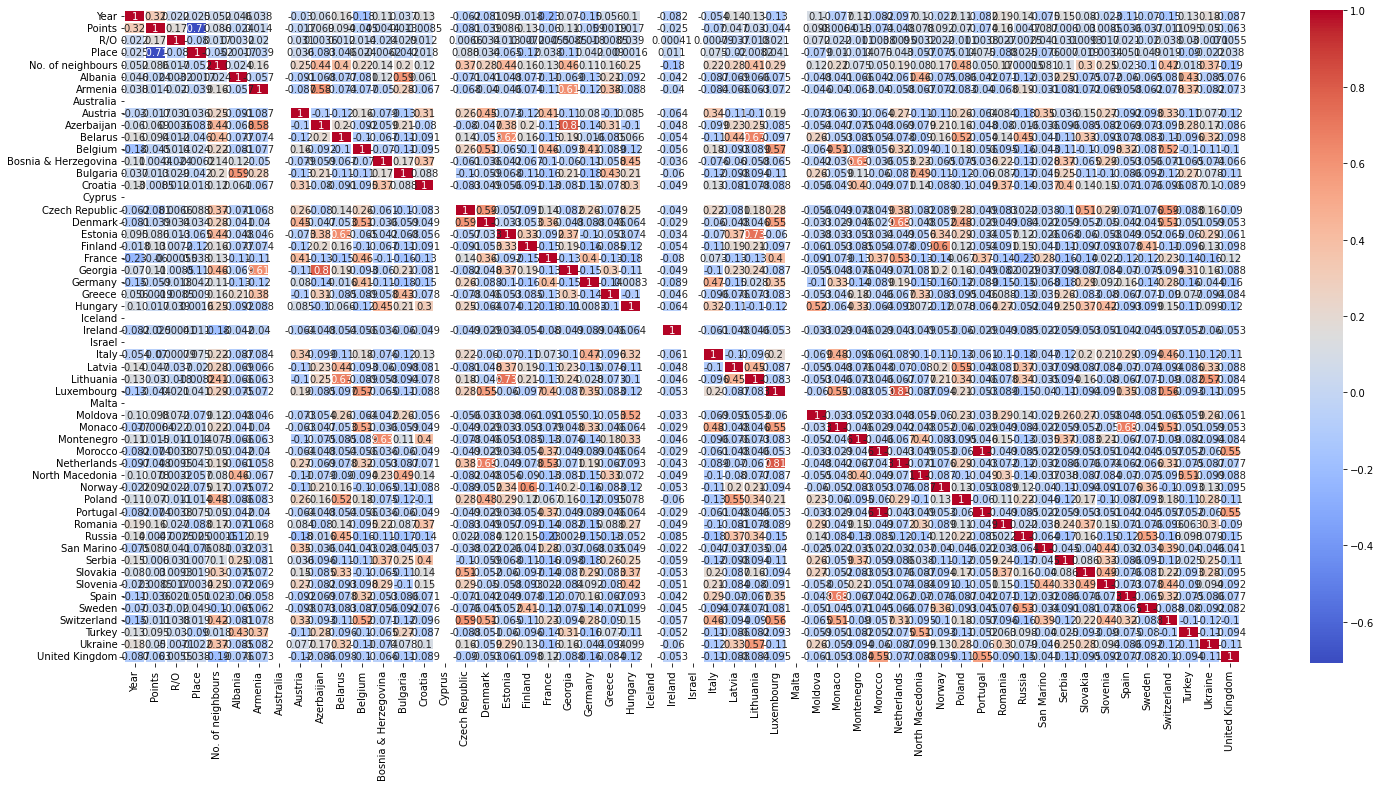

In [16]:
### first we present the correlation graphically.
fig, ax = plt.subplots()
fig.set_size_inches(25, 12)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

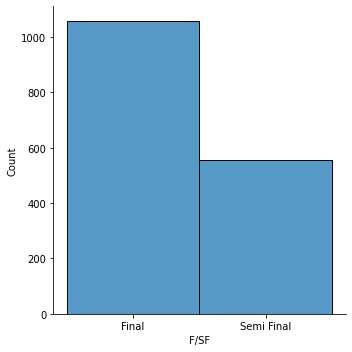

In [17]:
#### Check the numbers of final and seminfinal using histogram
sns.displot(df['F/SF'])

C:\Users\user-pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F/SF', ylabel='Country'>

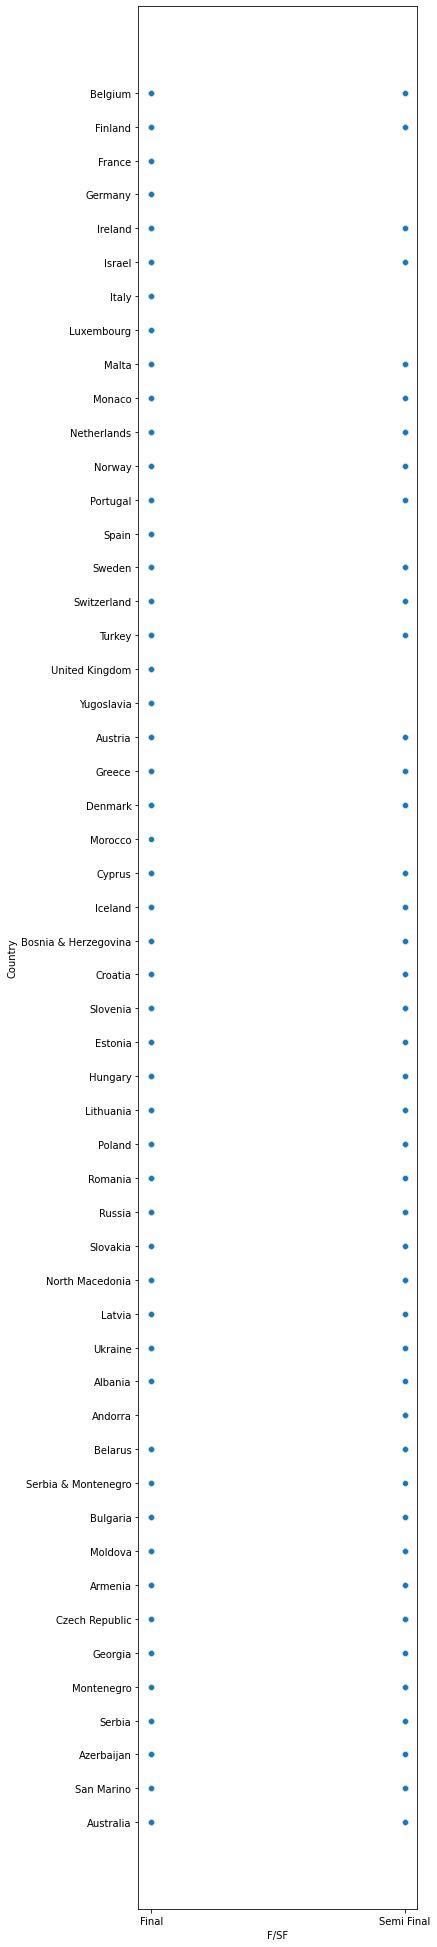

In [18]:
### checking which country is in the final and which one is in the semifinal, and which are in both
fig,ax=plt.subplots()
fig.set_size_inches(5,35)
sns.scatterplot(df['F/SF'], df['Country'])

C:\Users\user-pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Points', ylabel='Country'>

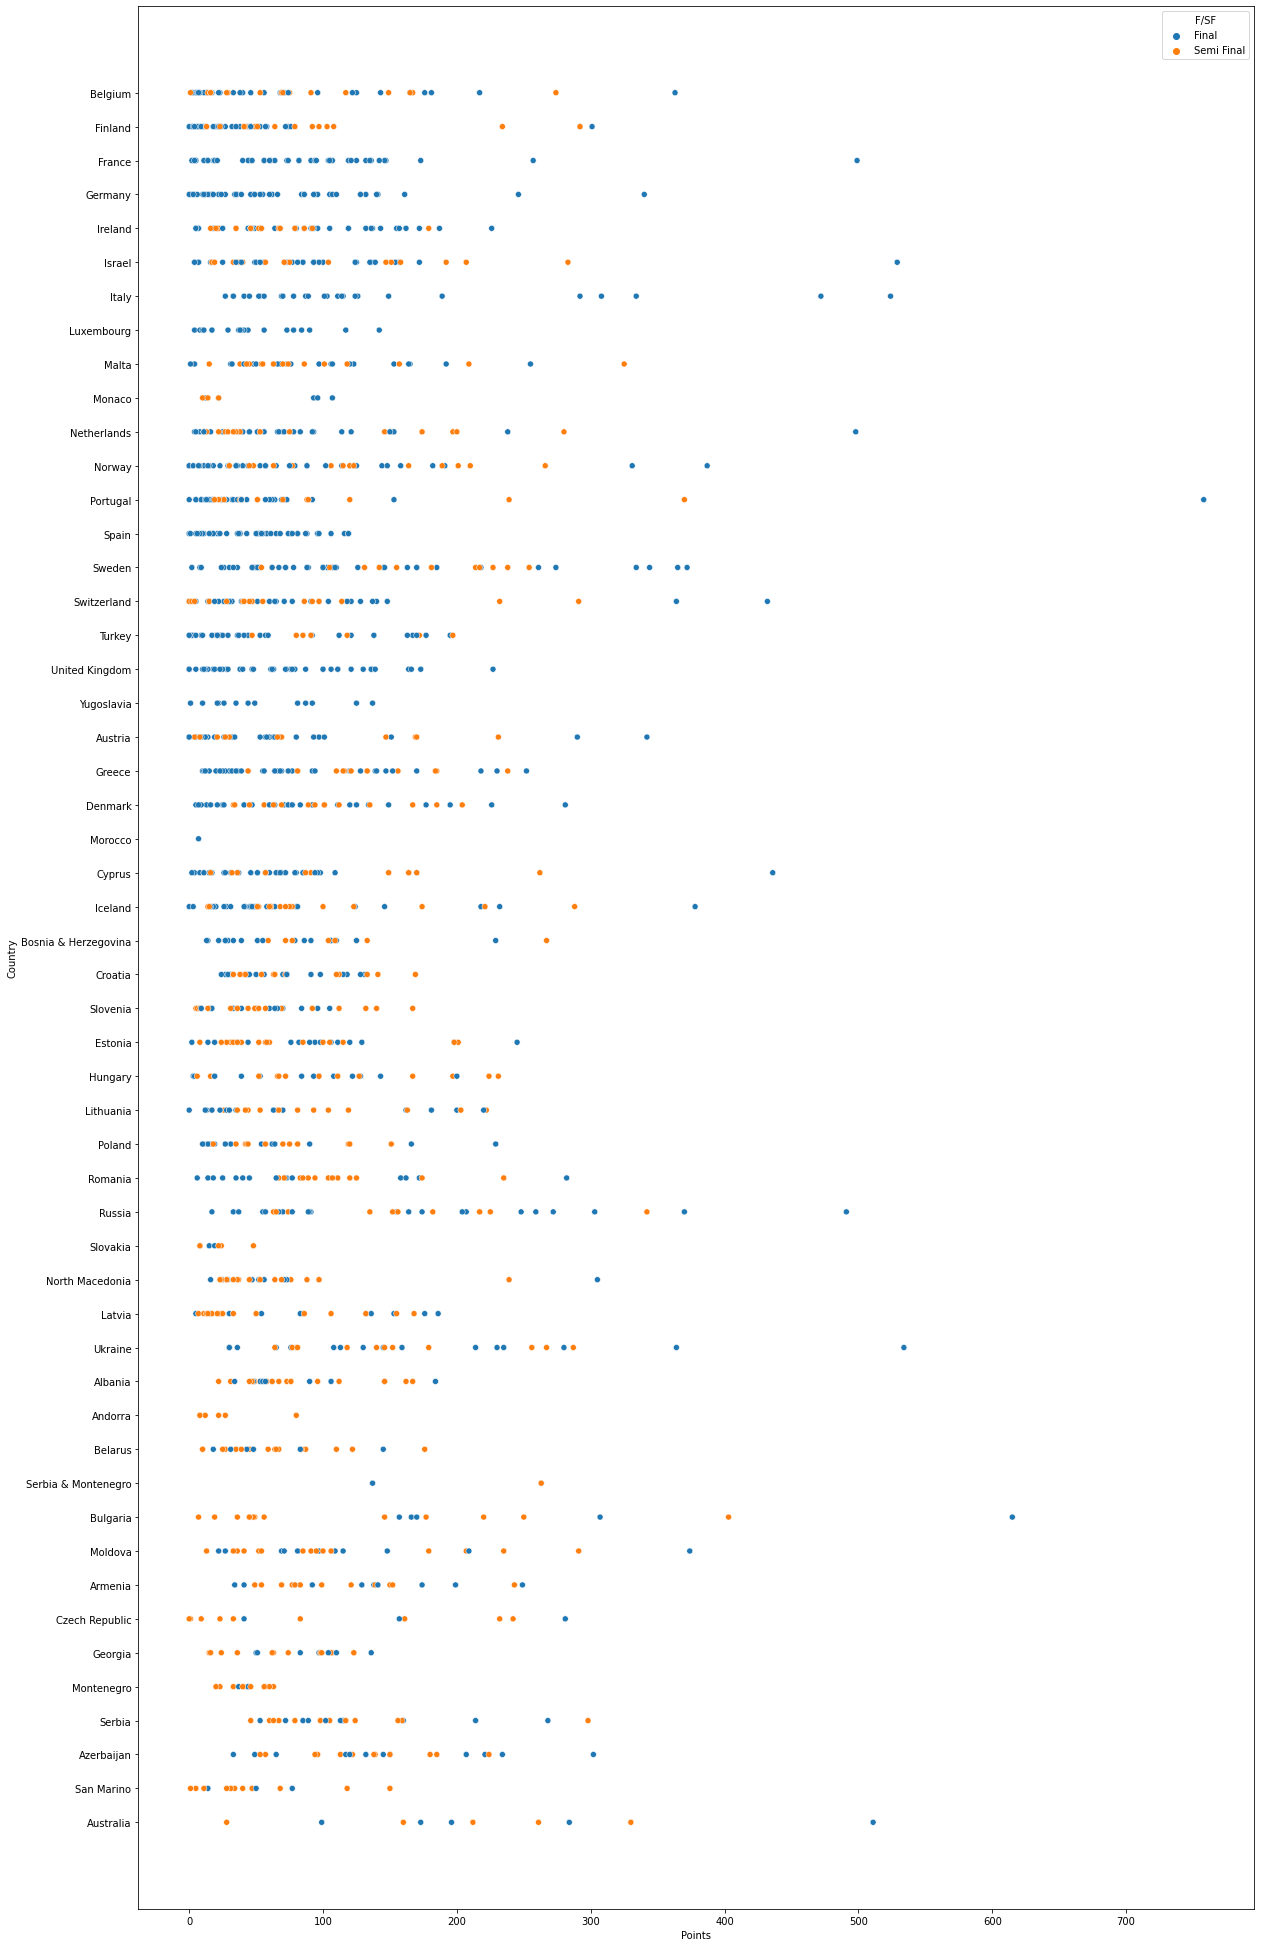

In [19]:
### checking the points of country, and from the graph we can guess which country has the highest scoreS.
fig,ax=plt.subplots()
fig.set_size_inches(20,35)
sns.scatterplot(df['Points'], df['Country'],hue=df['F/SF'])

<AxesSubplot:xlabel='Place', ylabel='Points'>

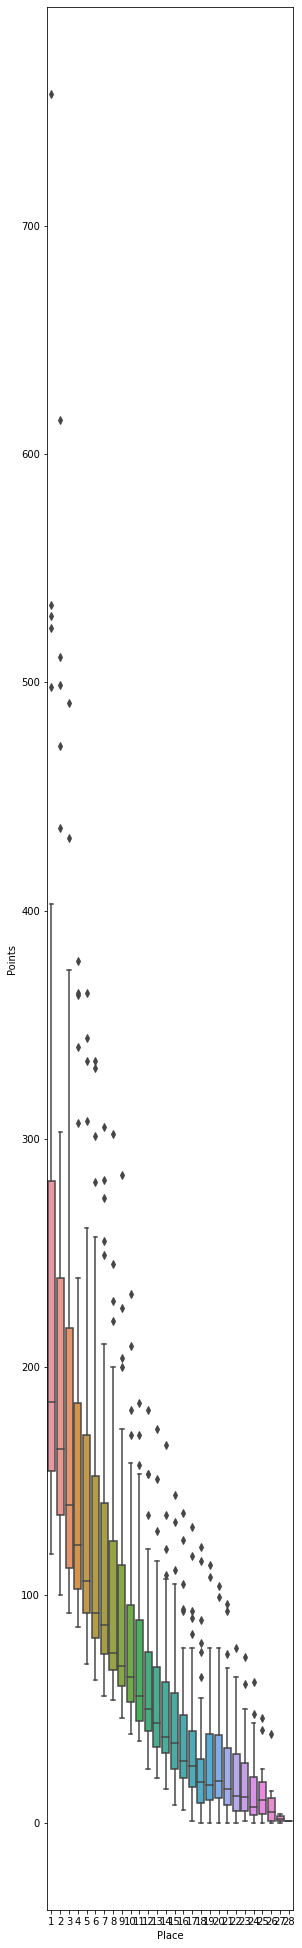

In [20]:
''' Make box plot.It gives the information about the maximum, minimum, mean, first quartile, and third quartile of a continuous variable.
 Also, it equips us with knowledge of outliers.
 '''

import seaborn as sns
fig,ax=plt.subplots()
fig.set_size_inches(15,35)
plt.subplot(133)
sns.boxplot(y = df['Points'], x = df['Place'])

# **Convert categorical columns into numeric form**

In [21]:
### Now we are moving towards our model building section.
### so we converted first the categorical columns into the numeric form and then build the model.

# First we extract the categorical columns.
cat_val=df.select_dtypes(include=['bool','category','object'])
cat_val.columns

Index(['Country', 'F/SF', 'Contest_Location', 'Jury_1.0', 'Jury_2.0',
       'Jury_3.0', 'Jury_4.0', 'Jury_5.0', 'Jury_6.0', 'Jury_7.0', 'Jury_8.0',
       'Jury_10.0', 'Jury_12.0'],
      dtype='object')

In [22]:
### Import label Encoder for converting the value into the numeric form
from sklearn.preprocessing import LabelEncoder
for var in cat_val:
  df[var]=LabelEncoder().fit_transform(df[var])

In [23]:
df.head()

,Country,F/SF,Year,Points,R/O,Place,Contest_Location,Jury_1.0,Jury_2.0,Jury_3.0,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,7,0,1975,17.0,11,15,28,23,16,32,...,0,0,0,0,0,0,0,0,0,0
1,15,0,1975,74.0,15,7,28,22,30,23,...,0,0,0,0,0,1,0,0,0,0
2,16,0,1975,91.0,3,4,28,23,36,27,...,0,0,0,0,1,0,1,0,0,0
3,18,0,1975,15.0,4,17,28,23,50,30,...,0,0,0,0,0,0,1,0,0,0
4,22,0,1975,68.0,2,9,28,23,46,49,...,0,0,0,0,0,0,0,0,0,1


We can see all the categorical columns has been converted into the numeric form

# **Prediction which country is in the Final and which is in Semifinal **

In [24]:
### Taking all columns as independent except those columns that we have to predict 
X=df.drop(columns=['F/SF','Year','Points','Place'])
y=df['F/SF'] ## 0 for Final, 1- Semi-Final


In [25]:
### Import Random forest model and training the model on existing values
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0,max_depth=10)
RF_model=classifier.fit(X,y)
RF_model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=0)

In [26]:
#Getting prediction from model by giving all independent features 
y_pred = classifier.predict(X)

In [27]:
### Model accuracy score 
RF_model.score(X,y)

0.8716676999380037

Model accuracy is 87.17%.

In [28]:
### Converting prediction array into the dataframe 
prediction=pd.DataFrame(y_pred,columns=['Model prediction'])
countries=dataset['Country']

In [29]:
### Check which countries in final which is in semi final according model prediction
Prediction=pd.merge(countries,prediction,left_index=True, right_index=True)
Prediction

,Country,Model prediction
0,Belgium,0
1,Finland,0
2,France,0
3,Germany,0
4,Ireland,0
...,...,...
1608,Switzerland,0
1609,Switzerland,1
1610,Ukraine,0
1611,Ukraine,1


here 0 is indicating final and 1 is indicating the semifinal.


# **Prediction country Points**

In [30]:
### Taking all columns as independent except those columns that we have to predict. 
X=df.drop(columns=['F/SF','Year','Points','Place'])
y=df['Points']

In [31]:
### Import command of Random forest model and training the model on existing values
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0,max_depth=10)
RF_model=classifier.fit(X,y)

In [32]:
#Getting prediction from model by giving all independent features 
y_pred = classifier.predict(X)

In [33]:
### Model accuracy score 
RF_model.score(X,y)

0.981401115933044

Model accuracy is 98.14%.

In [34]:
### Converting prediction array into the dataframe 
prediction=pd.DataFrame(y_pred,columns=['Predicted Points'])
countries=dataset['Country']

In [35]:
### Checking prediction points of model for the countries
Prediction=pd.merge(countries,prediction,left_index=True, right_index=True)
Prediction

,Country,Predicted Points
0,Belgium,17.0
1,Finland,74.0
2,France,91.0
3,Germany,15.0
4,Ireland,68.0
...,...,...
1608,Switzerland,432.0
1609,Switzerland,291.0
1610,Ukraine,364.0
1611,Ukraine,267.0


# **Prediction country Placing **

In [36]:
### Taking all columns as independent except those columns that we have to predict. 
X=df.drop(columns=['F/SF','Year','Points','Place'])
y=df['Place']

In [37]:
### Import command of Random forest model and training the model on existing values
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0,max_depth=10)
RF_model=classifier.fit(X,y)

In [38]:
#Getting prediction from model by giving all independent features 
y_pred = classifier.predict(X)

In [39]:
### Model accuracy score 
RF_model.score(X,y)

0.8394296342219467

Model accuracy is 83.94%.

In [40]:
### Converting prediction array into the dataframe 
prediction=pd.DataFrame(y_pred,columns=['Predicted place'])
countries=dataset['Country']

In [41]:
### Checking prediction Place of model for the countries
Prediction=pd.merge(countries,prediction,left_index=True, right_index=True)
Prediction.tail(50)

,Country,Predicted place
1563,Bulgaria,10
1564,Croatia,11
1565,Cyprus,16
1566,Cyprus,6
1567,Czech Republic,15
1568,Denmark,10
1569,Estonia,13
1570,Finland,6
1571,Finland,5
1572,France,2


# **Questions**

**Q No 1**: Can we predict which countries will reach the final?

 **Q no 2 :**  Can we predict countries total points ?

 **Q no 3:** Can we predict any country's placing ?